In this Ipython Notebook, I applied the same analytics to the new unlabeled dataset (year 2017).

### Data Engineering Challenge

In [1]:
## Importing necessary packages

import pandas as pd
import datetime as dt
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Defining columns
name_don=["CMTE_ID","AMNDT_IND","RPT_TP","TRANSACTION_PGI","IMAGE_NUM","TRANSACTION_TP","ENTITY_TP","NAME","CITY","STATE","ZIP_CODE","EMPLOYER","OCCUPATION","TRANSACTION_DT","TRANSACTION_AMT","OTHER_ID","TRAN_ID","FILE_NUM","MEMO_CD","MEMO_TEXT","SUB_ID"]
name_cm=["CMTE_ID","CMTE_NM","TRES_NM","CMTE_ST1","CMTE_ST2","CMTE_CITY","CMTE_ST","CMTE_ZIP","CMTE_DSGN","CMTE_TP","CMTE_PTY_AFFILIATION","CMTE_FILING_FREQ","ORG_TP","CONNECTED_ORG_NM","CAND_ID"]
name_cn=["CAND_ID","CAND_NAME","CAND_PTY_AFFILIATION","CAND_ELECTION_YR","CAND_OFFICE_ST","CAND_OFFICE","CAND_OFFICE_DISTRICT","CAND_ICI","CAND_STATUS","CAND_PCC","CAND_ST1","CAND_ST2","CAND_CITY","CAND_ST","CAND_ZIP"]
df_don = pd.read_csv("./data/itcont.txt", sep='|', header=None, names=name_don, dtype={"TRANSACTION_DT":"str"})
df_cm = pd.read_csv("./data/cm.txt", sep='|', header=None, names=name_cm)
df_cn = pd.read_csv("./data/cn.txt", sep='|', header=None, names=name_cn)
df_don.head(5)

/usr/programs/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00629618,N,TER,P,201701230300133512,15C,IND,"PEREZ, JOHN A",LOS ANGELES,CA,...,PRINCIPAL,DOUBLE NICKEL ADVISORS,01032017,40,H6CA34245,SA01251735122,1141239,NaN,NaN,2012520171368850783
1,C00177436,N,M2,P,201702039042410893,15,IND,"WATJEN, THOMAS R.",KEY LARGO,FL,...,UNUM,CHAIRMAN OF THE BOARD,01042017,5000,NaN,40373239,1147350,NaN,NaN,4020820171370029334
2,C00177436,N,M2,P,201702039042410893,15,IND,"SABOURIN, JAMES",LOOKOUT MOUNTAIN,GA,...,UNUM,"SVP, CORPORATE COMMUNICATIONS",01312017,230,NaN,PR1890575345050,1147350,NaN,P/R DEDUCTION ($115.00 BI-WEEKLY),4020820171370029335
3,C00177436,N,M2,P,201702039042410893,15,IND,"MAKER, SCOTT T.",NORTH YARMOUTH,ME,...,UNUM,"SVP, DEPUTY GENERAL COUNSEL, BUSINESS",01312017,384,NaN,PR2260663445050,1147350,NaN,P/R DEDUCTION ($192.00 BI-WEEKLY),4020820171370029336
4,C00177436,N,M2,P,201702039042410894,15,IND,"DEEHAN, WILLIAM N",ALPHARETTA,GA,...,UNUM,"SVP, SALES, CL",01312017,384,NaN,PR2283873845050,1147350,NaN,P/R DEDUCTION ($192.00 BI-WEEKLY),4020820171370029337


In [3]:
df_don["TRANSACTION_DT"] = pd.to_datetime(df_don["TRANSACTION_DT"], format='%m%d%Y', errors='coerce')

In [4]:
df_don2 = df_don[["CMTE_ID", "STATE","TRANSACTION_AMT", "OTHER_ID"]]
df_cm2 = df_cm[["CMTE_ID","CAND_ID"]]
df_cn2 = df_cn[["CAND_ID", "CAND_PTY_AFFILIATION"]]

In [5]:
df = df_don2.merge(df_cm2, how="inner", on="CMTE_ID")
df = df.merge(df_cn2, how="inner", on="CAND_ID")

In [6]:
us_states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY","GU","PR","VI"]
us_states = sorted(us_states)

In [7]:
df = df[(df["CAND_PTY_AFFILIATION"] == "DEM") | (df["CAND_PTY_AFFILIATION"] == "REP") ]

In [8]:
df = df[df["STATE"].apply(lambda row: True if row in us_states else False)]

In [9]:
df["OTHER_ID"].fillna(value=0, inplace=True)

In [10]:
def categorize_donor(num):
    if num != 0:
        return int(1)
    else:
        return 0

In [11]:
df["OTHER_ID"] = df["OTHER_ID"].apply(categorize_donor)
df2 = df[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT"]]

In [12]:
# now we group df by state and party
df_grp_1 = df2.groupby(["CAND_PTY_AFFILIATION", "STATE"])

### Average Donations, Total Number of Donations and Sum fo Donations to each party in each states

Here, we observe that the average donation to Republican party is higher in most of the states.
However, in most of the states more number of donations correspond to Democratic party. 

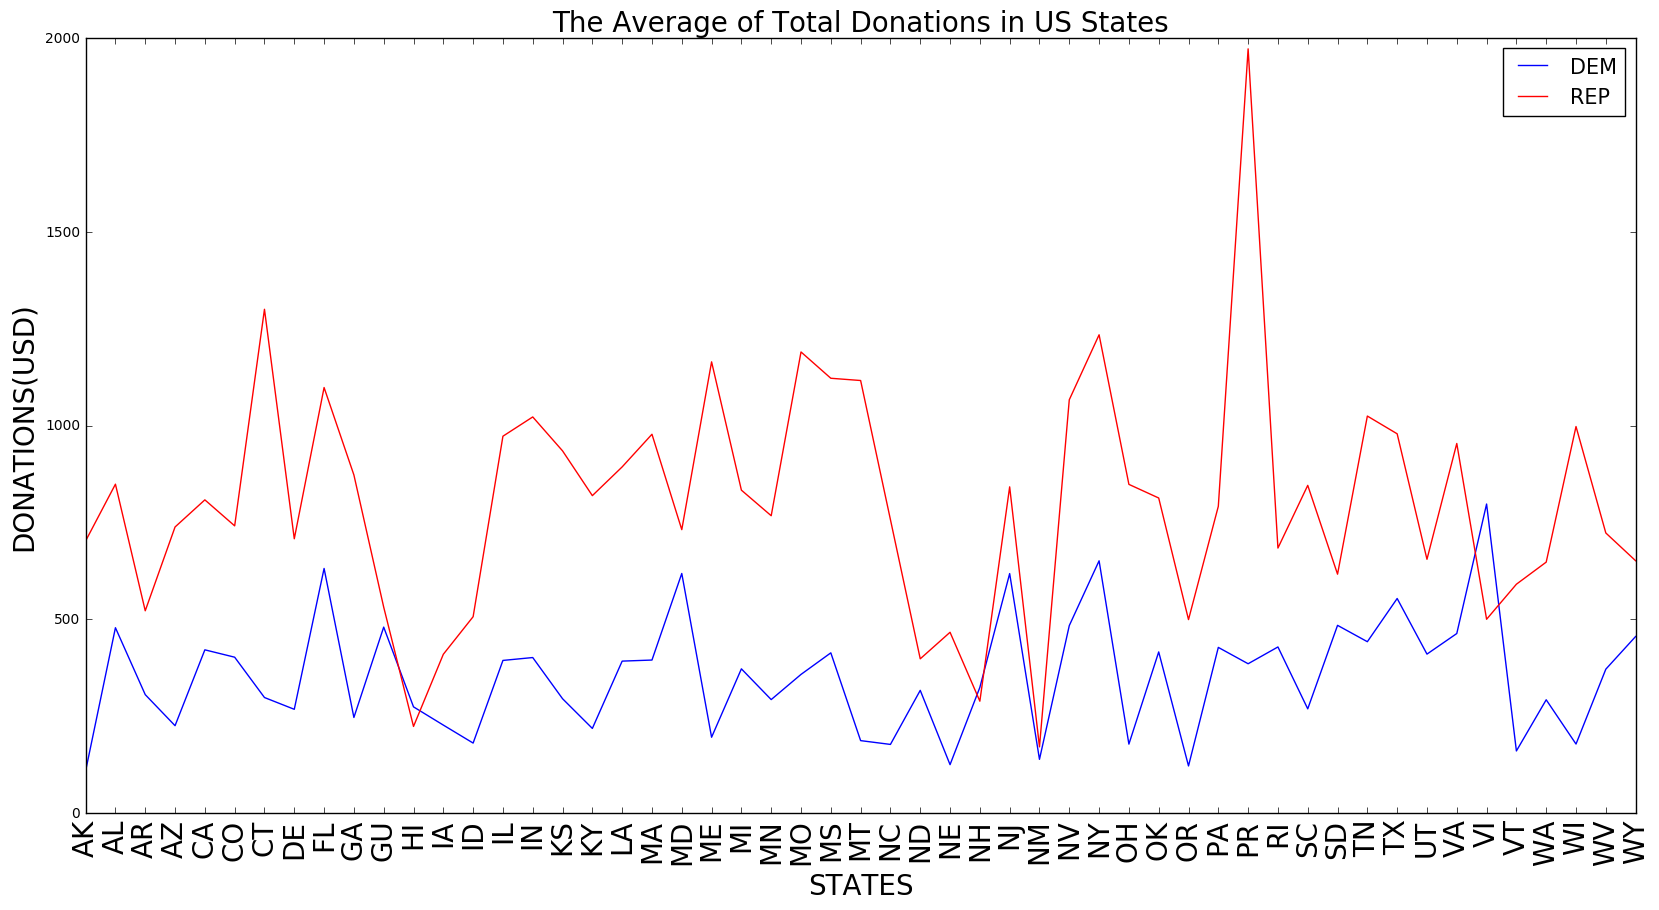

In [14]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_1.mean().unstack().ix["DEM",:53]), label='DEM')
plt.plot(np.array(df_grp_1.mean().unstack().ix["REP",:53]),'r', label='REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('The Average of Total Donations in US States', fontsize=20)

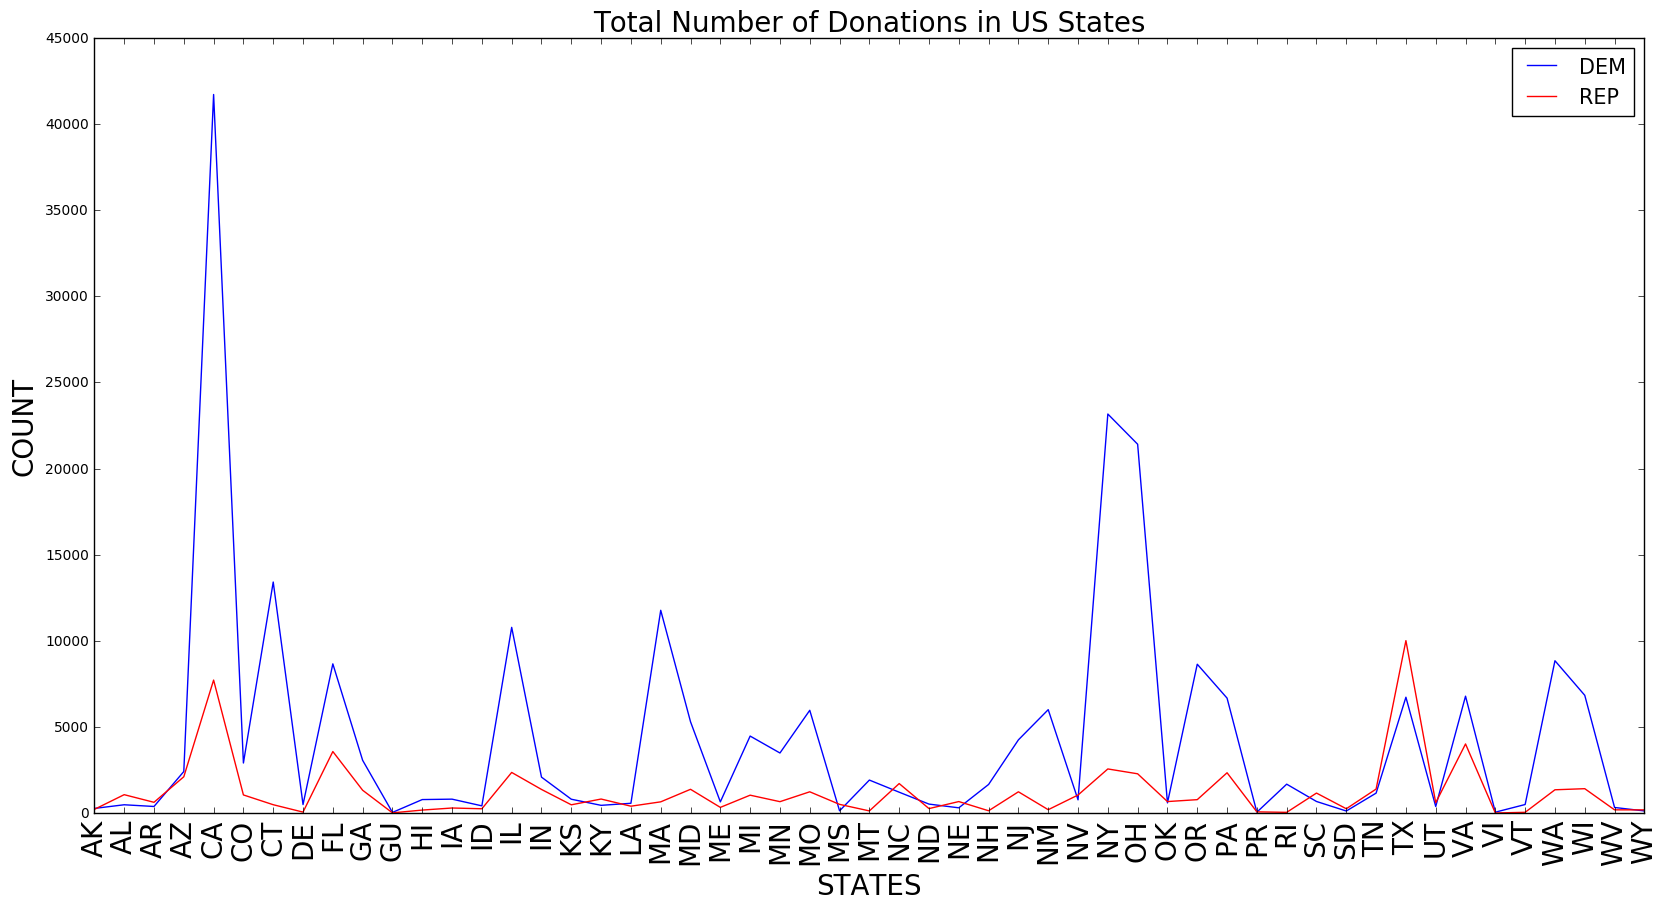

In [15]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_1.count().unstack().ix["DEM",:53]), label='DEM')
plt.plot(np.array(df_grp_1.count().unstack().ix["REP",:53]),'r', label='REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNT', fontsize = 20)
plt.title('Total Number of Donations in US States', fontsize=20)

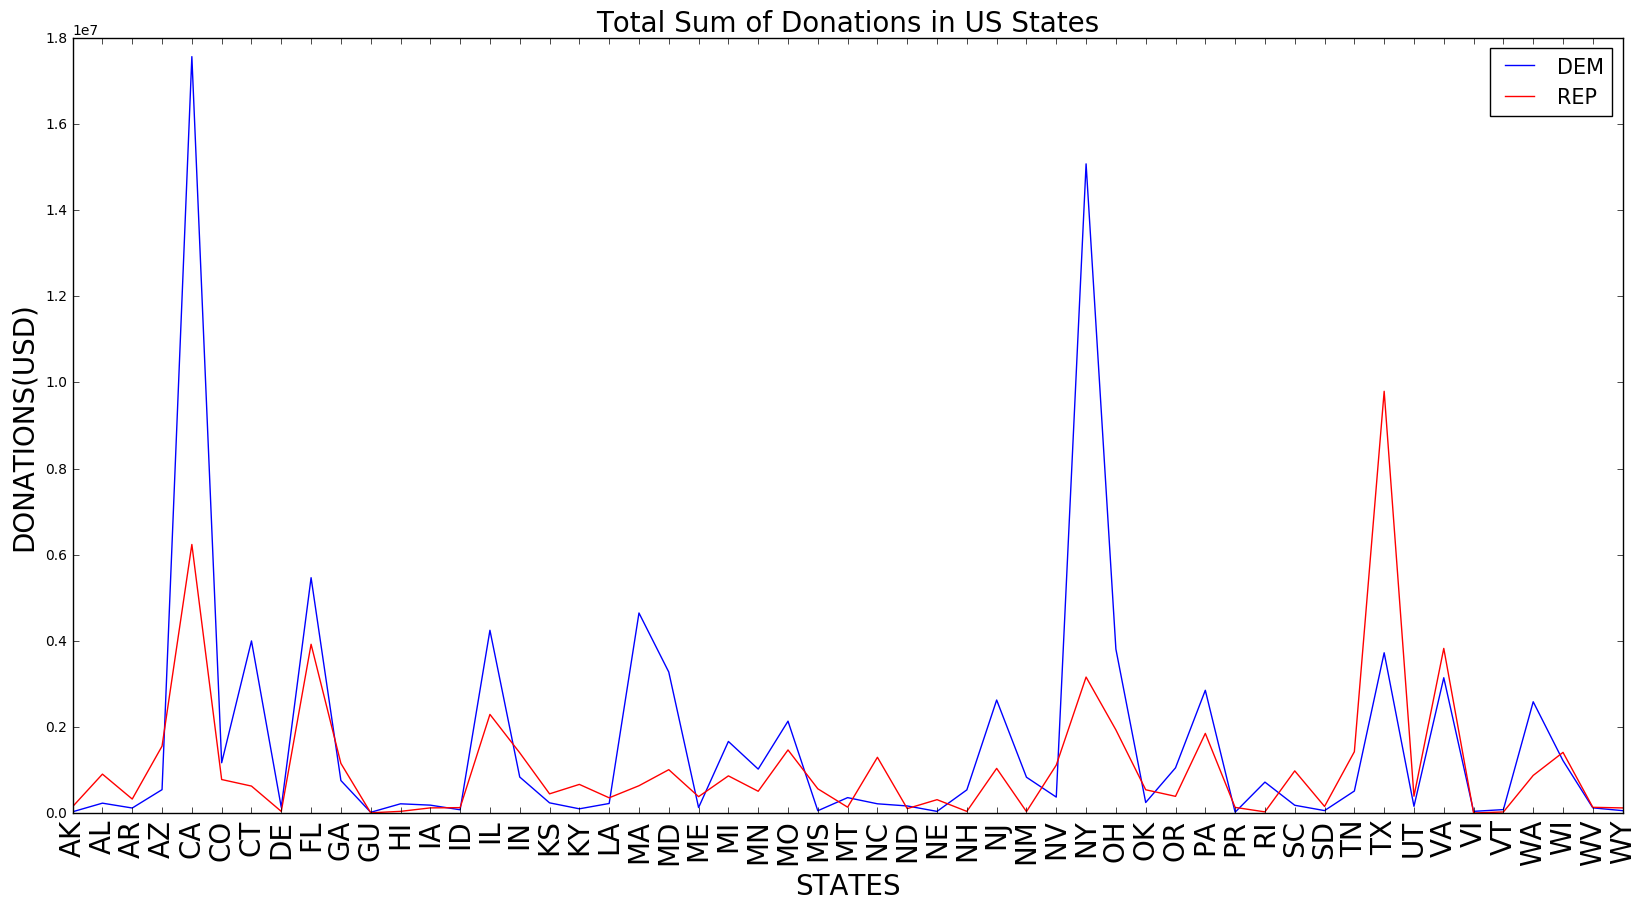

In [16]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_1.sum().unstack().ix["DEM",:53]), label='DEM')
plt.plot(np.array(df_grp_1.sum().unstack().ix["REP",:53]),'r', label='REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATIONS(USD)', fontsize = 20)
plt.title('Total Sum of Donations in US States', fontsize=20)

### Studying the trend of the donations by Individual

In [17]:
df3 = df[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT", "OTHER_ID"]]
df3 = df3[df3["OTHER_ID"] == 0]
df3 = df3[["STATE", "CAND_PTY_AFFILIATION", "TRANSACTION_AMT"]]
df_grp_1_ind = df3.groupby(["CAND_PTY_AFFILIATION", "STATE"])

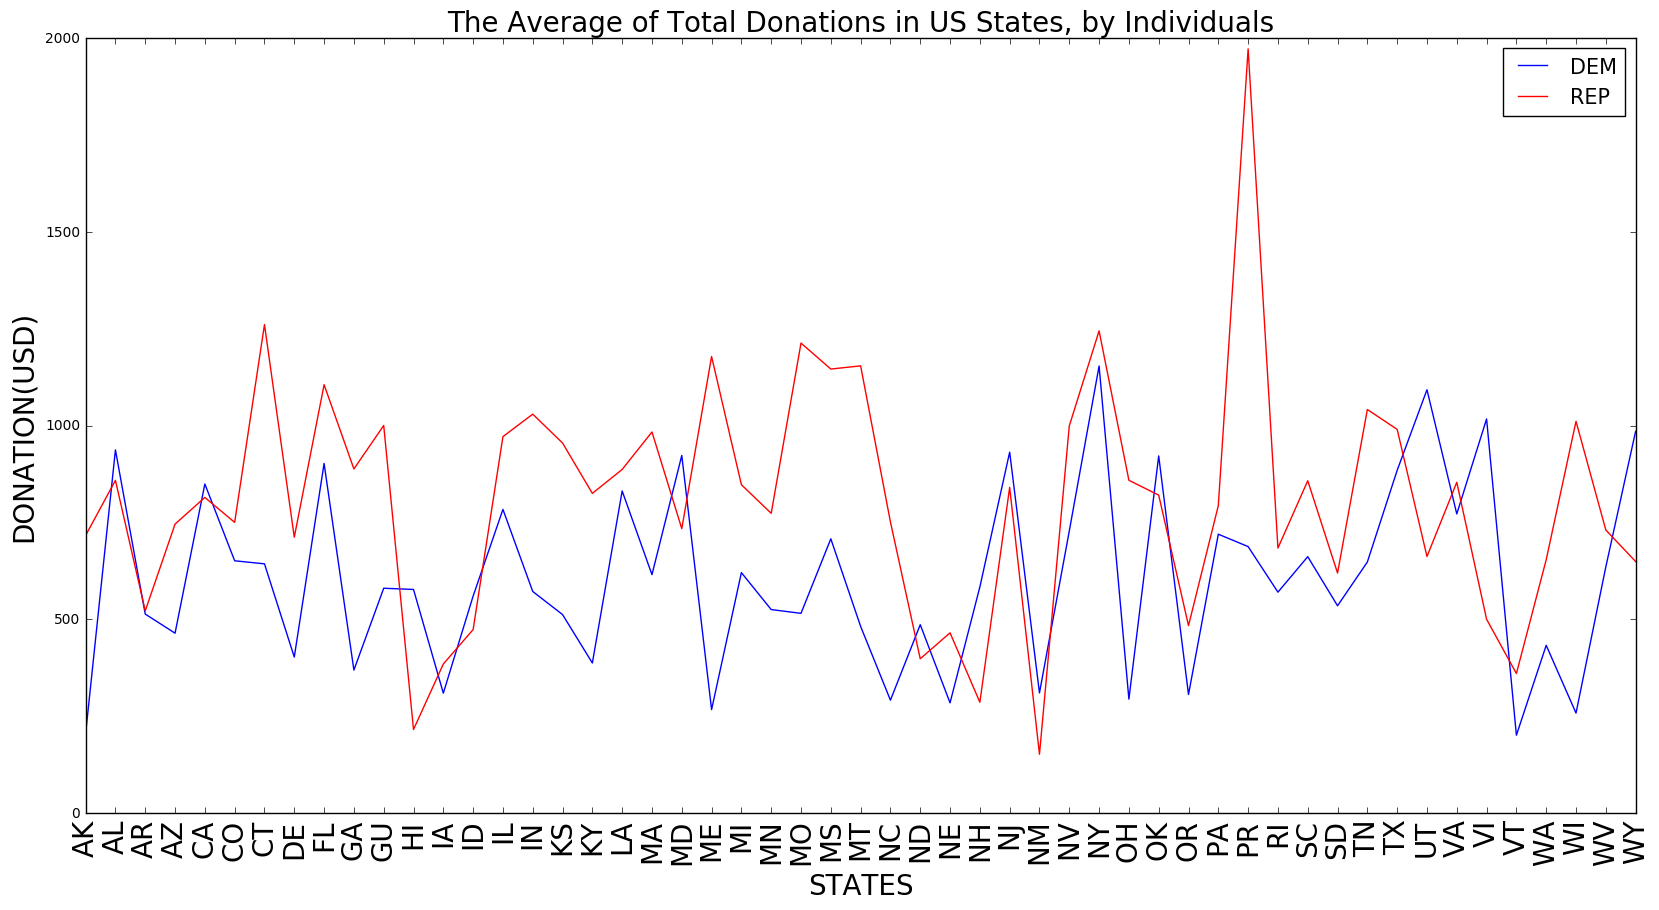

In [18]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_1_ind.mean().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_1_ind.mean().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATION(USD)', fontsize = 20)
plt.title('The Average of Total Donations in US States, by Individuals', fontsize=20)

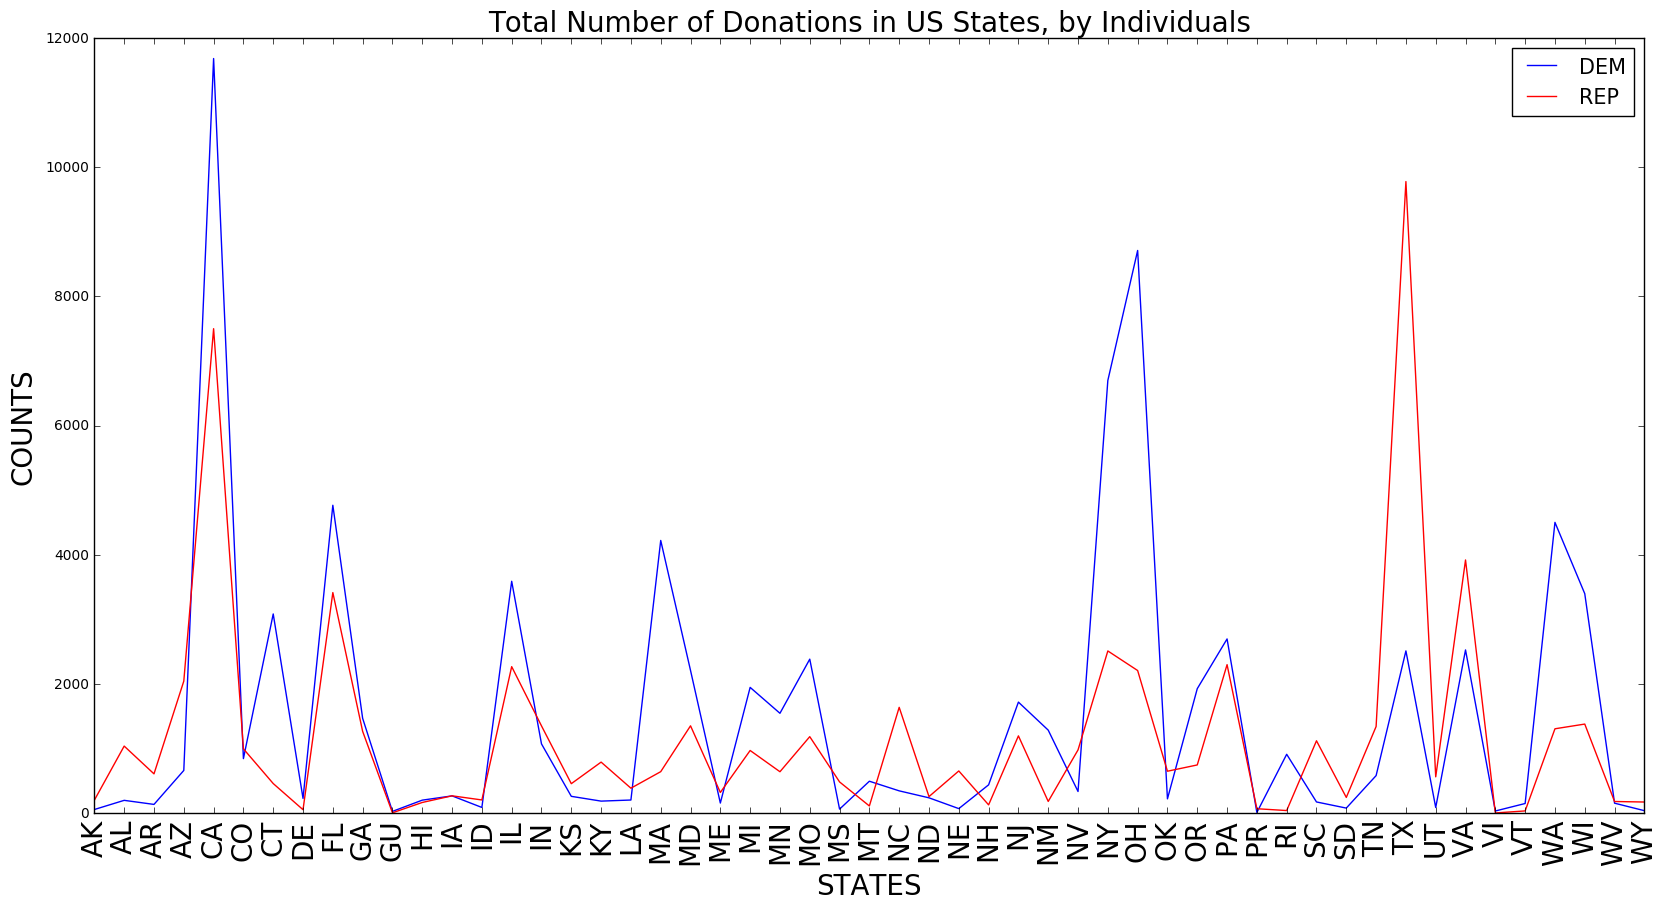

In [19]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_1_ind.count().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_1_ind.count().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States, by Individuals', fontsize=20)

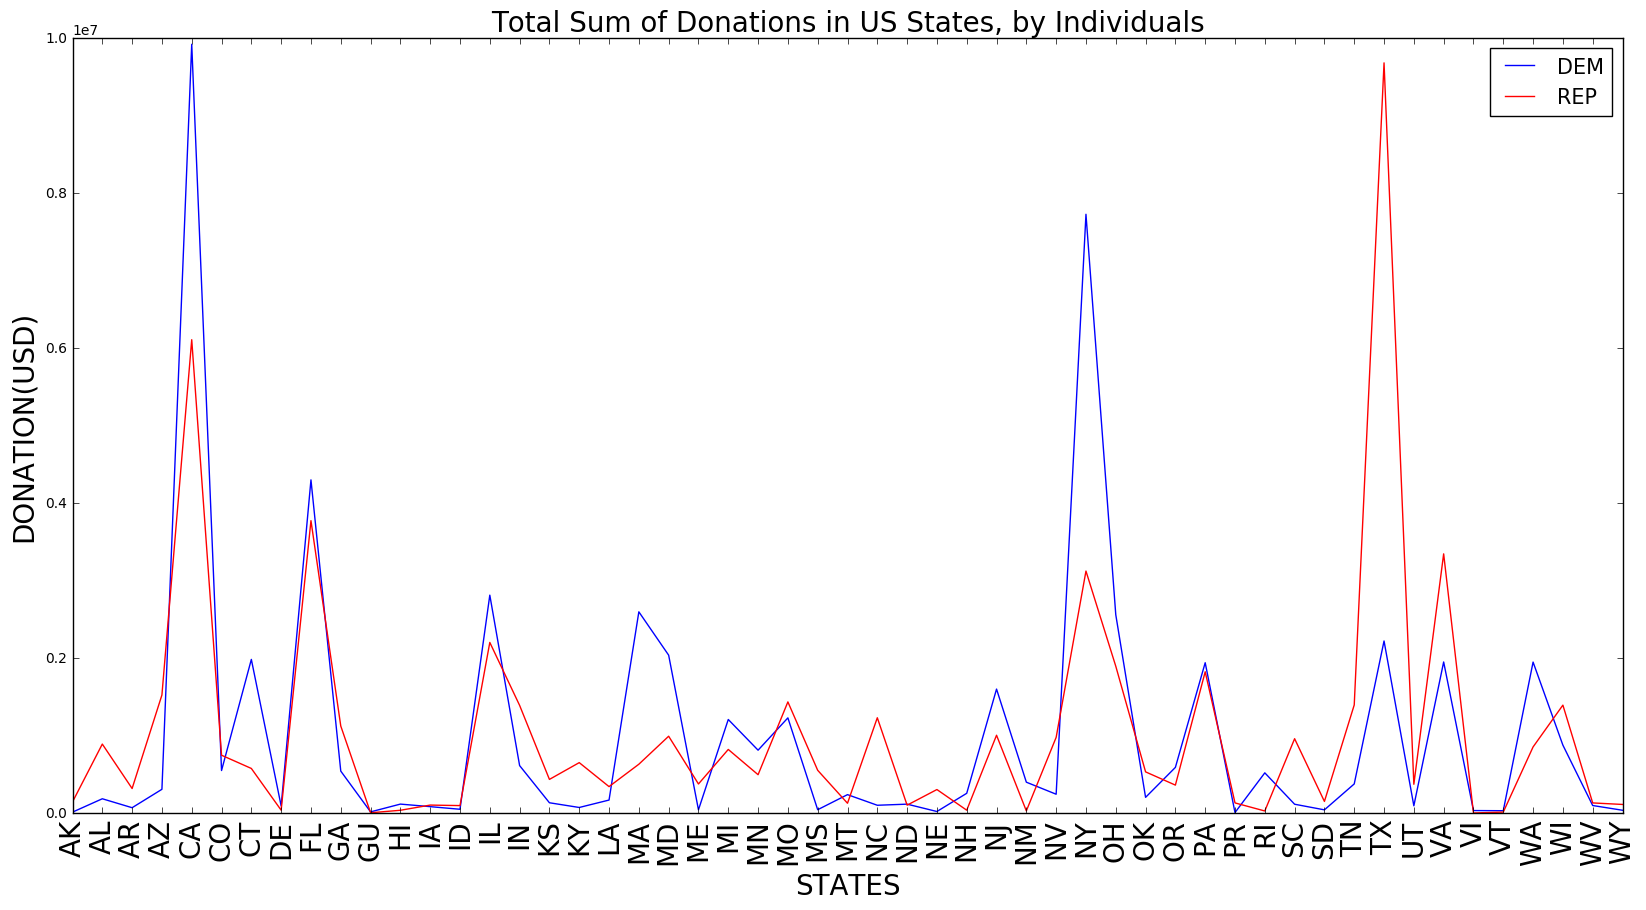

In [20]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_1_ind.sum().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_1_ind.sum().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATION(USD)', fontsize = 20)
plt.title('Total Sum of Donations in US States, by Individuals', fontsize=20)

### Studying the trend of the donations by Corporations

From the following three plots, we observe that the average donations by corporation to Republicans are much higher in the states. For few states, there has been no donation by corporation to the Republican side. However, the number of donations by corporation to the Democratic party is order of magnitude higher.

In [21]:
df4 = df[["STATE", "CAND_PTY_AFFILIATION","TRANSACTION_AMT", "OTHER_ID"]]
df4 = df4[df4["OTHER_ID"] == 1]
df4 = df4[["STATE", "CAND_PTY_AFFILIATION", "TRANSACTION_AMT"]]
df_grp_1_corp = df4.groupby(["CAND_PTY_AFFILIATION", "STATE"])

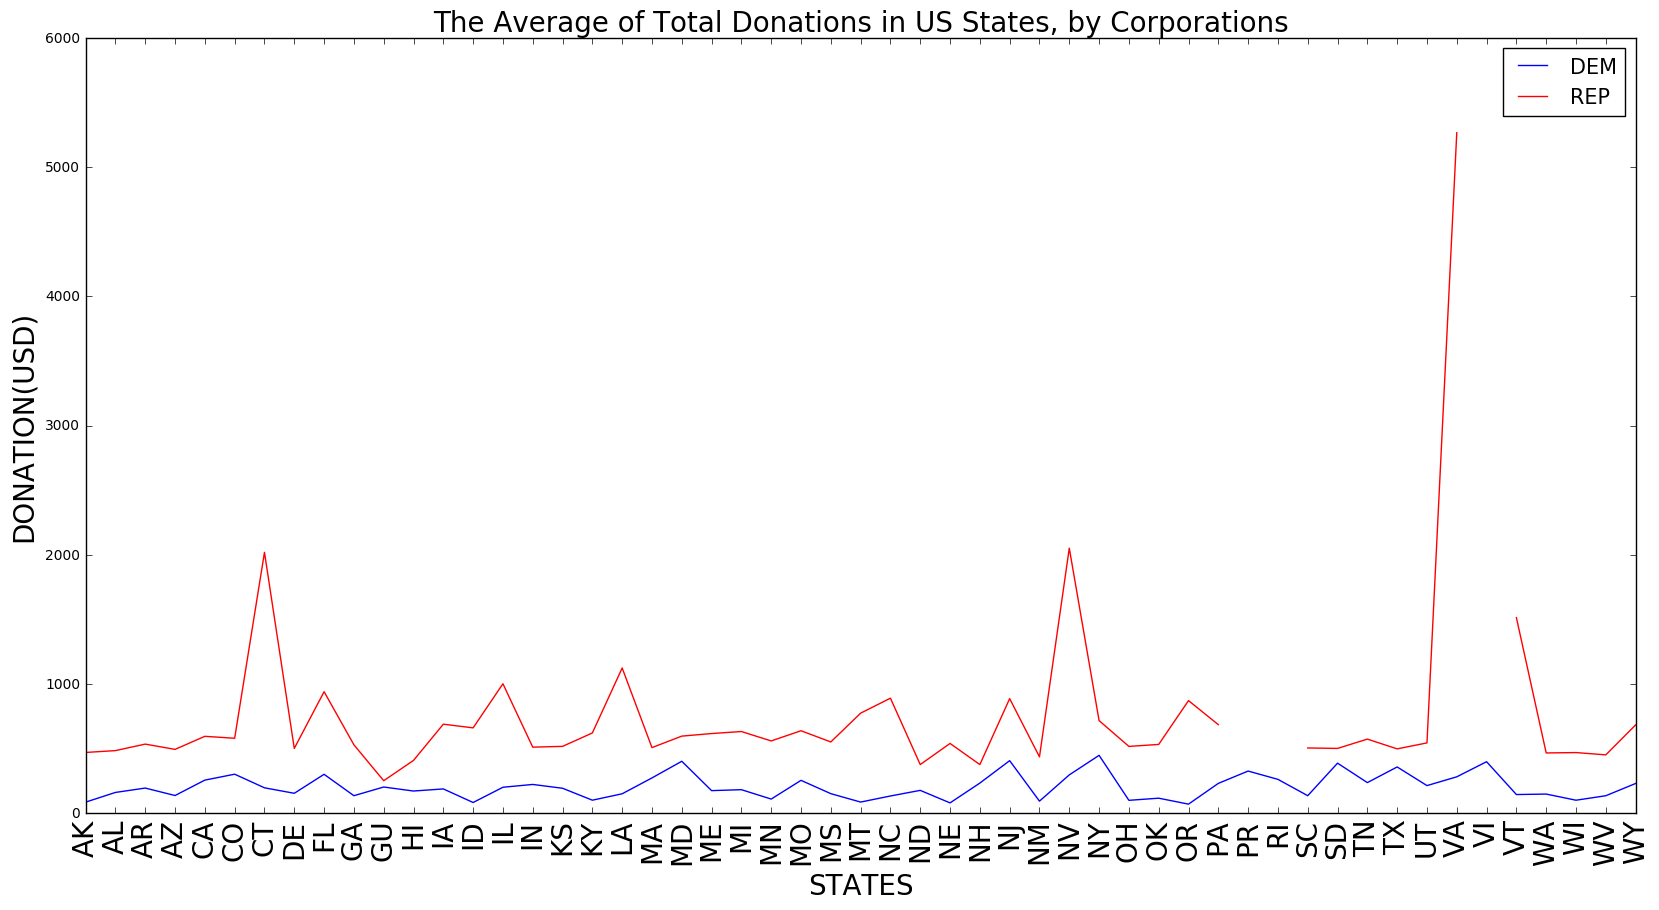

In [22]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_1_corp.mean().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_1_corp.mean().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATION(USD)', fontsize = 20)
plt.title('The Average of Total Donations in US States, by Corporations', fontsize=20)

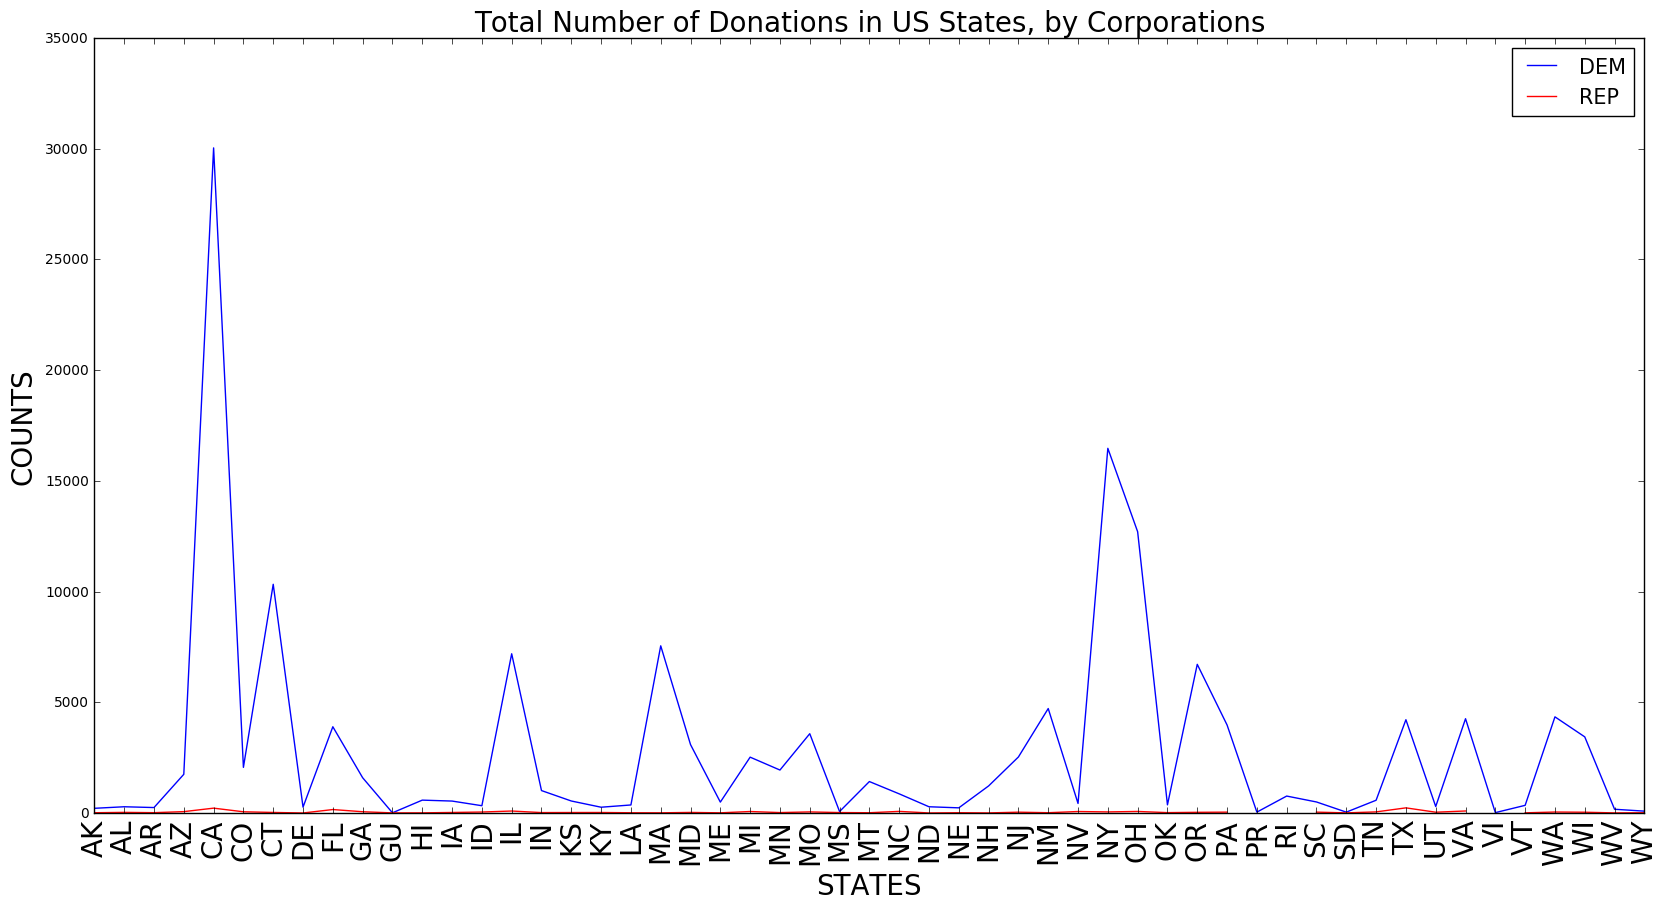

In [23]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_1_corp.count().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_1_corp.count().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('COUNTS', fontsize = 20)
plt.title('Total Number of Donations in US States, by Corporations', fontsize=20)

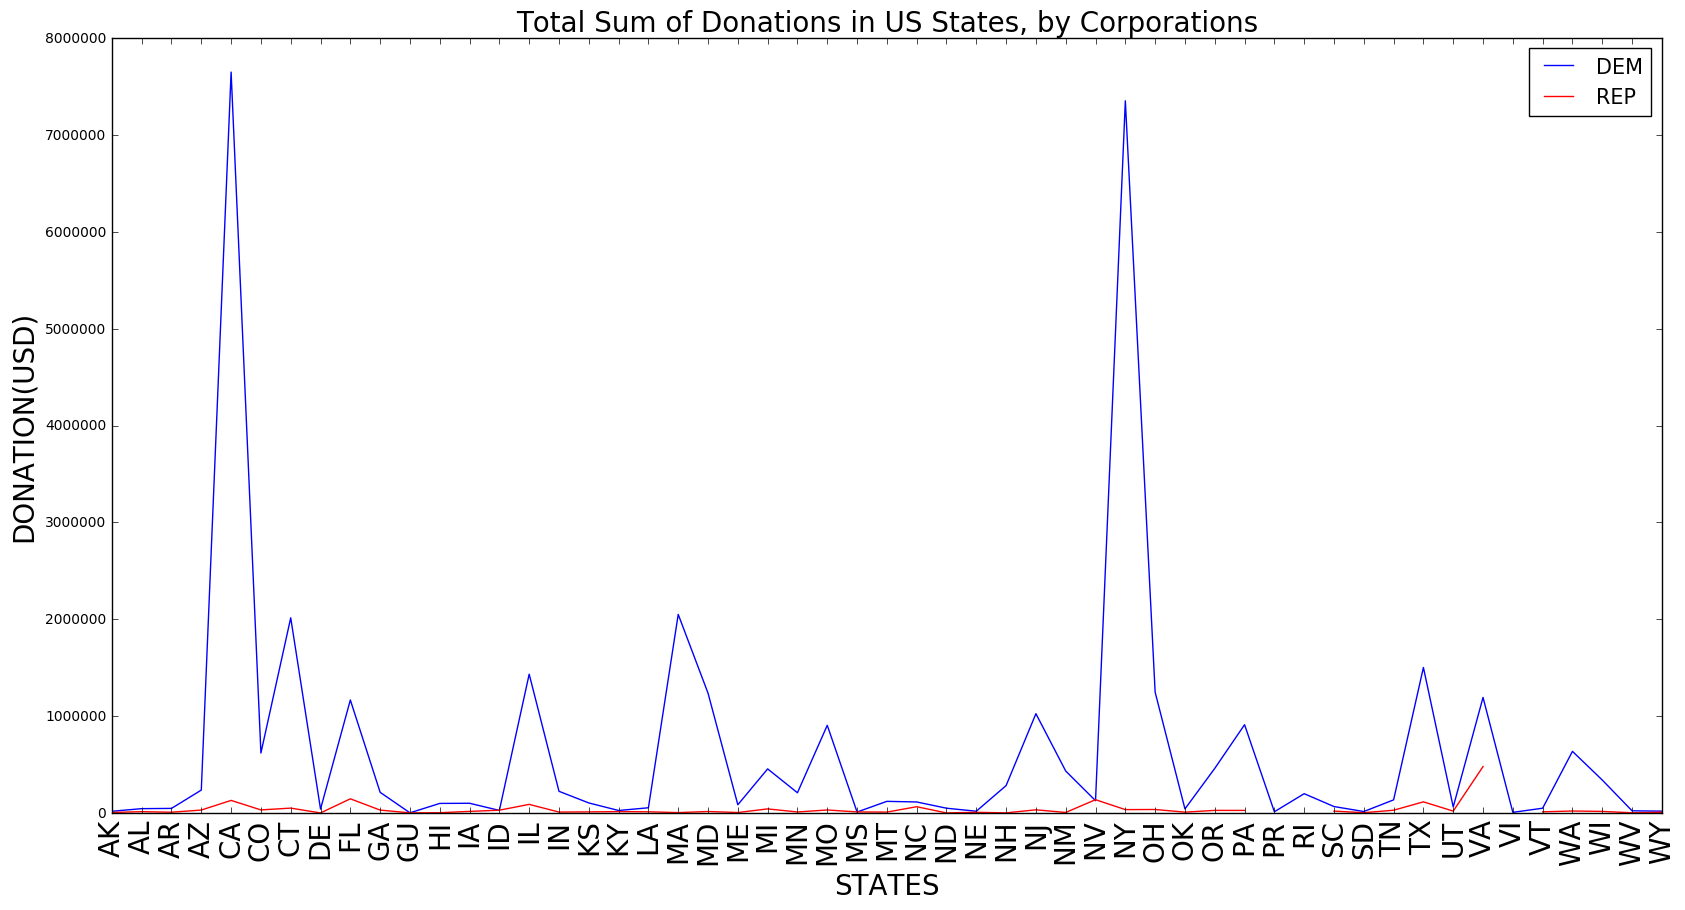

In [24]:
plt.figure(figsize=(20,10))
x = np.arange(53)
plt.xticks(x, np.array(us_states), rotation=90, fontsize=20)
plt.plot(np.array(df_grp_1_corp.sum().unstack().ix["DEM",:53]), label = 'DEM')
plt.plot(np.array(df_grp_1_corp.sum().unstack().ix["REP",:53]),'r', label = 'REP')
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('STATES', fontsize = 20)
plt.ylabel('DONATION(USD)', fontsize = 20)
plt.title('Total Sum of Donations in US States, by Corporations', fontsize=20)